In [ ]:
# Calculates overlap integral based on circular or hexagonal subapertures

In [48]:
import poppy
import pickle
import pandas as pd
import numpy as np
import astropy.modeling
import astropy.units as u
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

## Circular pupil

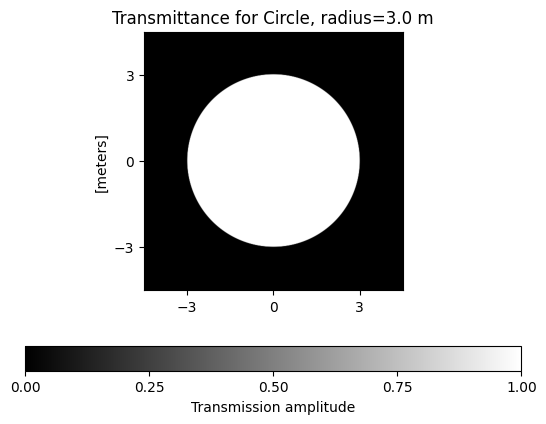

In [41]:
# circular pupil

osys_circ = poppy.OpticalSystem()
osys_circ.add_pupil( poppy.CircularAperture(radius=3))    # pupil radius in meters
osys_circ.display()

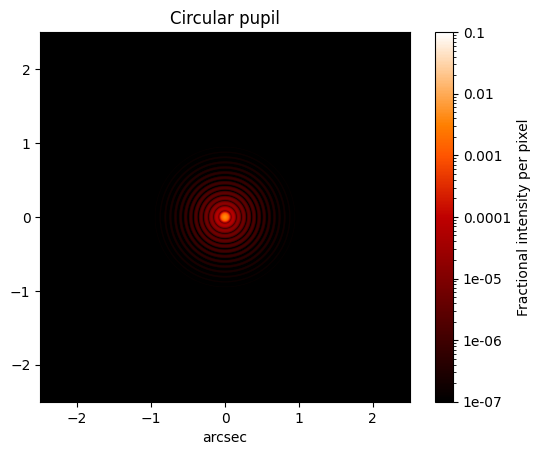

In [42]:
osys_circ.add_detector(pixelscale=0.010, fov_arcsec=5.0)  # image plane coordinates in arcseconds
psf = osys_circ.calc_psf(2e-6)                            # wavelength in meters
poppy.display_psf(psf, title='Circular pupil')

In [46]:
np.shape(psf[0].data)

(1000, 1000)

In [47]:
psf[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1000                                                  
NAXIS2  =                 1000                                                  
EXTEND  =                    T                                                  
PLANE1  = 'Wavefront Intensity'                                                 
WAVELEN =                2E-06 / Weighted mean wavelength in meters             
DIFFLMT =  0.06875493541569878 / Diffraction limit lambda/D in arcsec           
OVERSAMP=                    2 / Oversampling factor for FFTs in computation    
DET_SAMP=                    2 / Oversampling factor for MFT to detector plane  
PIXELSCL=                0.005 / Scale in arcsec/pix (after oversampling)       
FOV     =                  5

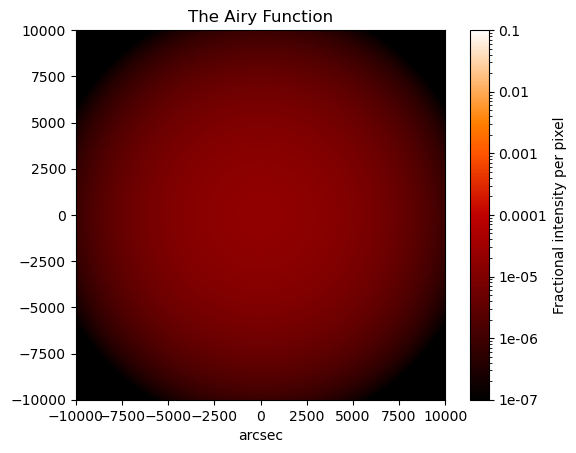

In [4]:
# circular pupil
'''
osys = poppy.OpticalSystem()
osys.add_pupil( poppy.CircularAperture(radius=2e-5))    # pupil radius in meters
osys.add_detector(pixelscale=100.0, fov_arcsec=20000.0)  # image plane coordinates in arcseconds

psf = osys.calc_psf(2e-6)                            # wavelength in meters
poppy.display_psf(psf, title='The Airy Function')
'''

## Hexagonal pupil

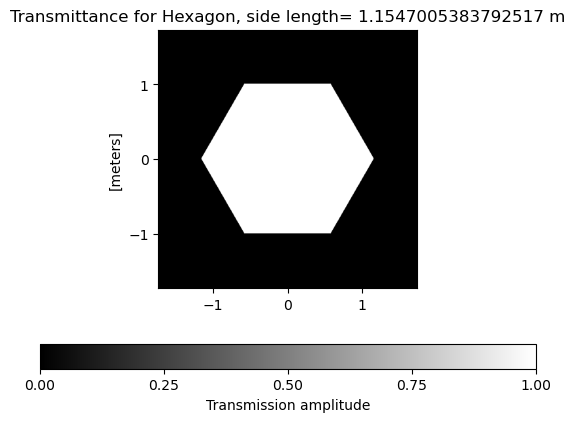

In [5]:
# hexagonal pupil

osys_hex = poppy.OpticalSystem()
osys_hex.add_pupil(poppy.HexagonAperture(flattoflat=2))

osys_hex.display()

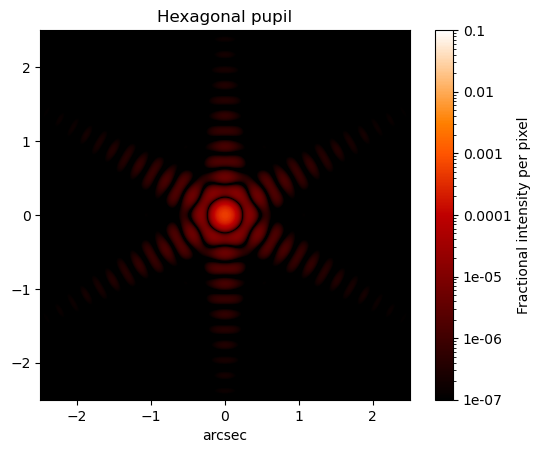

In [6]:
osys_hex.add_detector(pixelscale=0.010, fov_arcsec=5.0)  # image plane coordinates in arcseconds
psf = osys_hex.calc_psf(2e-6)                            # wavelength in meters
poppy.display_psf(psf, title='Hexagonal pupil')

In [16]:
# read in waveguide mode profile

'''
S. Gross:

The waveguide modes have a 4sigma diameter of 8.3x7.6um. 
A simple Gaussian fit gives a 1/e2 diameter of 5.8x5.4um. 
Both at a wavelength of 1550nm.

The attached CSV file contains the corresponding intensity profile. 
The scale is 0.2161um per pixel.
'''
stem = '/Users/bandari/Documents/git.repos/glint_misc/notebooks/data/'

open_file = open(stem + 'waveguide_intensity.pkl', "rb")
df_intensity, xycen = pickle.load(open_file)
open_file.close()

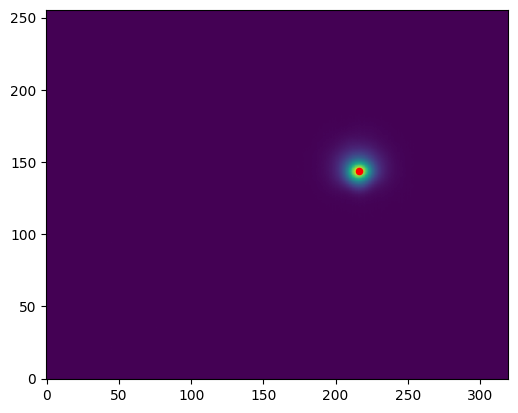

In [19]:
plt.imshow(df_intensity, origin="lower")
plt.scatter(xycen[0],xycen[1], color='red', s=20)
plt.show()

In [22]:
# cutout of 70x70 pix**2

buffer = 35
waveguide_cutout = df_intensity[int(xycen[1]-buffer):int(xycen[1]+buffer),int(xycen[0]-buffer):int(xycen[0]+buffer)]

In [26]:
# for physical axis: 0.2161um per pixel.

def pix2um(x):
    return x*0.2161

def um2pix(x):
    return x/0.2161

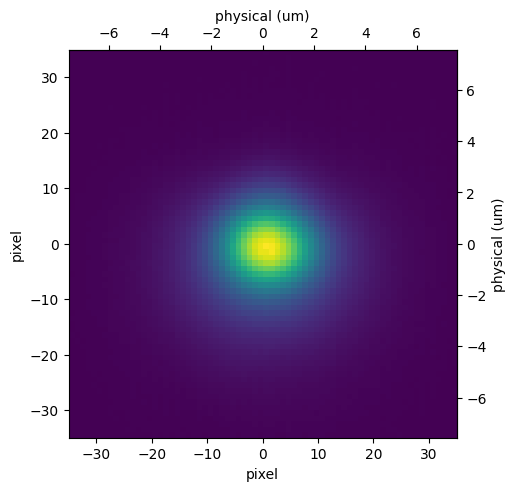

In [30]:
fig, ax = plt.subplots(layout='constrained')

ax.imshow(waveguide_cutout, extent=[-waveguide_cutout.shape[1]/2., waveguide_cutout.shape[1]/2., -waveguide_cutout.shape[0]/2., waveguide_cutout.shape[0]/2. ])
ax.set_xlabel('pixel')
ax.set_ylabel('pixel')

circ = Circle((xx,yy),50)
ax.add_patch(circ)

secax = ax.secondary_xaxis('top', functions=(pix2um, um2pix))
secax.set_xlabel('physical (um)')
secay = ax.secondary_yaxis('right', functions=(pix2um, um2pix))
secay.set_ylabel('physical (um)')
plt.show()

In [35]:
test = astropy.modeling.functional_models.AiryDisk2D(amplitude=1, x_0=0, y_0=0, radius=1)

In [36]:
from matplotlib.patches import Circle

<AiryDisk2D(amplitude=1., x_0=0., y_0=0., radius=1.)>